In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
data=pd.read_csv("bayes_features.csv")
data.iloc[0]
data.sentiment
data.sentiment.unique()

array([1., 0.])

$$log \frac{P(tweet|pos)}{P(tweet|neg)} = log(P(tweet|pos)) - log(P(tweet|neg)) $$
$$positive = log(P(tweet|pos)) = \sum_{i=0}^{n}{log P(W_i|pos)}$$
$$negative = log(P(tweet|neg)) = \sum_{i=0}^{n}{log P(W_i|neg)}$$

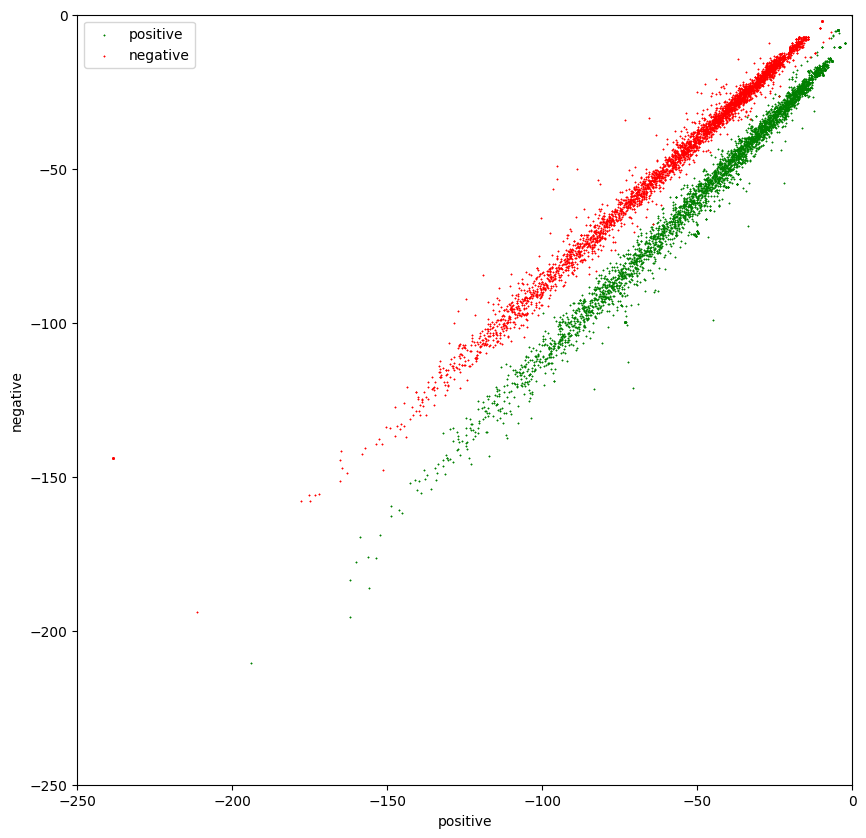

In [55]:
fig,ax=plt.subplots(figsize=(10,10))
colors=["red","green"]
sentiments=["negative","positive"]
index=data.index

for sentiment in data.sentiment.unique():
    ix=index[data.sentiment==sentiment]
    # print(ix.tolist())
    # print(data.iloc[ix].positive)
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])
    
ax.legend(loc="best")
plt.xlim(-250,0)
plt.ylim(-250,0)
plt.xlabel("positive")
plt.ylabel("negative")
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

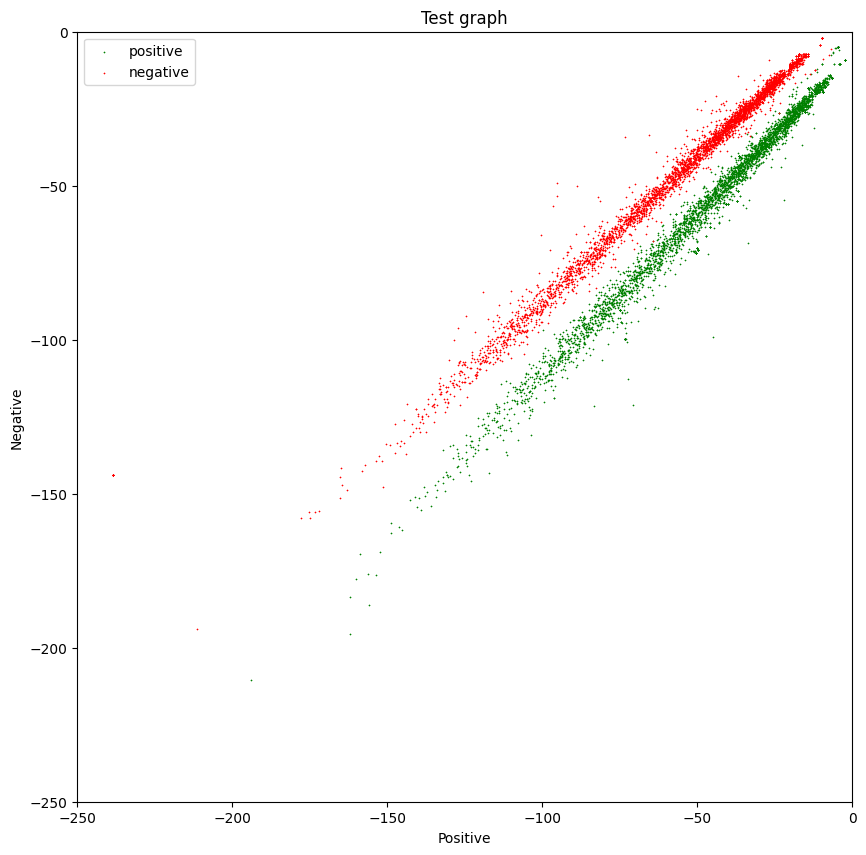

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

colors = ['red','green']
labels = ['negative','positive']

index = data.index

for sentiment in data.sentiment.unique():
    ix = index[sentiment == data.sentiment]
    print(ix.tolist())
    ax.scatter(data.iloc[ix].positive,data.iloc[ix].negative,s=0.01,c=colors[int(sentiment)],label=labels[int(sentiment)],marker='*')
    
ax.legend(loc='best')

plt.ylim(-250,0)
plt.xlim(-250,0)

ax.set(xlabel='Positive',ylabel='Negative',title='Test graph')

plt.show()

##### Confidence Ellipses to interpret Naïve Bayes
is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters: 

* Center: It is the numerical mean of the attributes
* Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard deviations used to plot the ellipse. 
* Angle: Related with the covariance among attributes.

The parameter __n_std__ stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

* About 68% of the area under the curve falls within 1 standard deviation around the mean.
* About 95% of the area under the curve falls within 2 standard deviations around the mean.
* About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

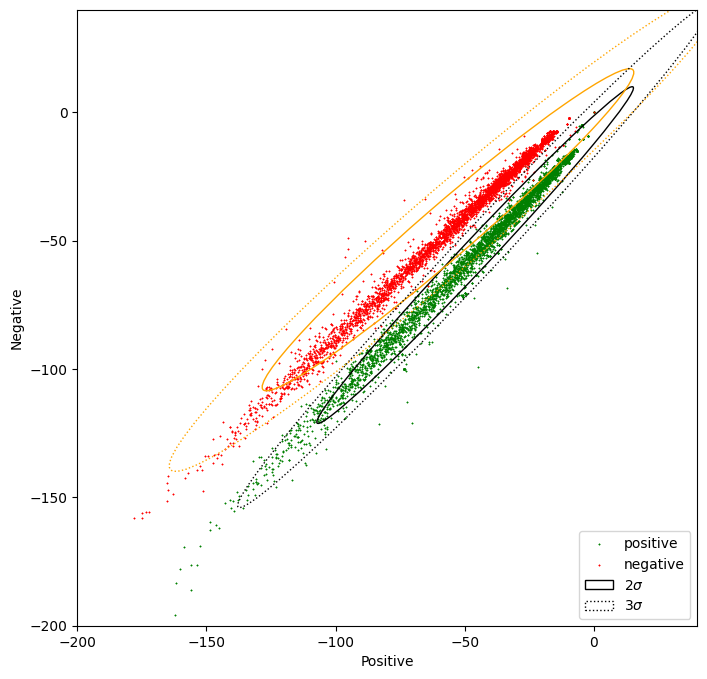

In [62]:
from utils import confidence_ellipse
fig, ax = plt.subplots(figsize = (8, 8))
colors = ['red', 'green'] 
sentiments = ['negative', 'positive'] 
index = data.index

for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

plt.xlim(-200,40)  
plt.ylim(-200,40)
plt.xlabel("Positive") 
plt.ylabel("Negative")
data_pos = data[data.sentiment == 1]
data_neg = data[data.sentiment == 0]
#2sd
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')
#3sd
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')
plt.show()

modify the features of the samples with positive sentiment (1), in a way that the two distributions overlap. In this case, the Naïve Bayes method will produce a lower accuracy than with the original data.

In [64]:
data2 = data.copy()
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50

/tmp/ipykernel_19175/4057447365.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50
/tmp/ipykernel_19175/4057447365.py:3: FutureWarning: ChainedAssignmentError: behaviour will 

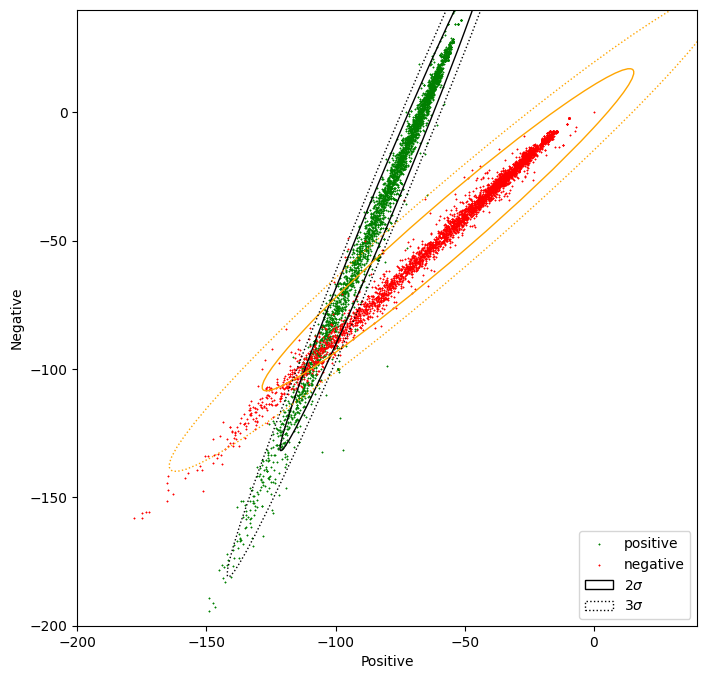

In [67]:
fig, ax = plt.subplots(figsize = (8, 8))
colors = ['red', 'green'] 
sentiments = ['negative', 'positive'] 
index = data.index

for sentiment in data2.sentiment.unique():
    ix = index[data2.sentiment == sentiment]
    ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

plt.xlim(-200,40)  
plt.ylim(-200,40)
plt.xlabel("Positive") 
plt.ylabel("Negative")
data_pos = data2[data2.sentiment == 1]
data_neg = data[data2.sentiment == 0]
#2sd
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')
#3sd
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')
plt.show()
